In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pylab as plt

In [23]:
dt = pd.read_csv("boxoffice.csv")

In [24]:
dt.head().T

,0,1,2,3,4
title,The Avengers,Titanic,Jurassic Park,Avatar,The Lion King
domestic_revenue,6026491,169411543,107836098,51433697,142791649
world_revenue,1274885664,1132871091,583329845,1225323391,604140729
distributor,Warner Bros.,Disney,Sony,Disney,Warner Bros.
opening_revenue,163620146,85549990,55681429,109775324,59476800
opening_theaters,253,122,3826,3868,2934
budget,174687337,103948486,122104991,46431596,203513696
MPAA,R,G,NC-17,G,R
genres,Animation,Action,Horror,Horror,Comedy
release_days,16,103,89,85,158


In [25]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   int64 
 2   world_revenue     2694 non-null   int64 
 3   distributor       2694 non-null   object
 4   opening_revenue   2694 non-null   int64 
 5   opening_theaters  2694 non-null   int64 
 6   budget            2694 non-null   int64 
 7   MPAA              2694 non-null   object
 8   genres            2694 non-null   object
 9   release_days      2694 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 210.6+ KB


In [26]:
dt.isnull().sum().sum()

np.int64(0)

In [27]:
dt["domestic_revenue"] = dt["domestic_revenue"].astype(str).str[1:]

In [28]:
dt["domestic_revenue"].head()

0      026491
1    69411543
2    07836098
3     1433697
4    42791649
Name: domestic_revenue, dtype: object

In [29]:
for c in ['domestic_revenue', 'opening_theaters', 'release_days']:
    dt[c] = dt[c].astype(str).str.replace(',','')
    temp = (~dt[c].isnull())
    dt.loc[temp, c] = dt.loc[temp, c].astype(float)
    dt[c] = pd.to_numeric(dt[c],errors='coerce')

    

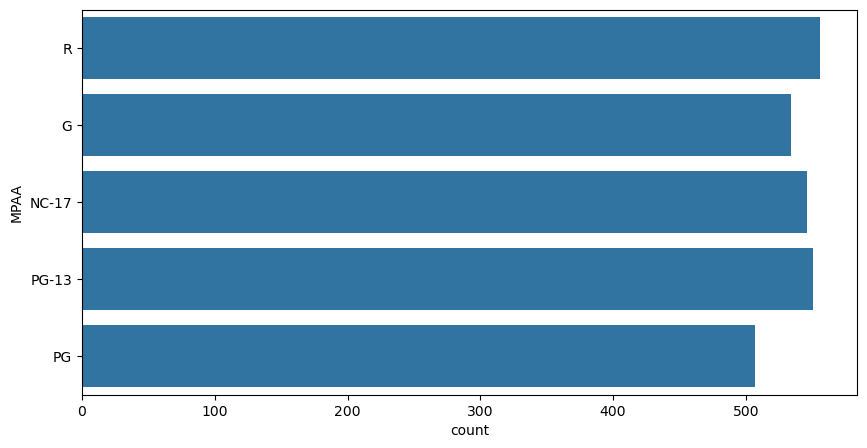

In [30]:
plt.figure(figsize=(10,5))
sb.countplot(dt["MPAA"])
plt.show()

In [31]:
dt.groupby('MPAA')['domestic_revenue'].mean()

MPAA
G        3.426099e+07
NC-17    3.452006e+07
PG       3.697347e+07
PG-13    3.510989e+07
R        3.670206e+07
Name: domestic_revenue, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_23496\1382610748.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(dt[c])
C:\Users\HP\AppData\Local\Temp\ipykernel_23496\1382610748.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(dt[c])
C:\Users\HP\AppData\Local\Temp\ipykernel_23496\1382610748.py:4: 

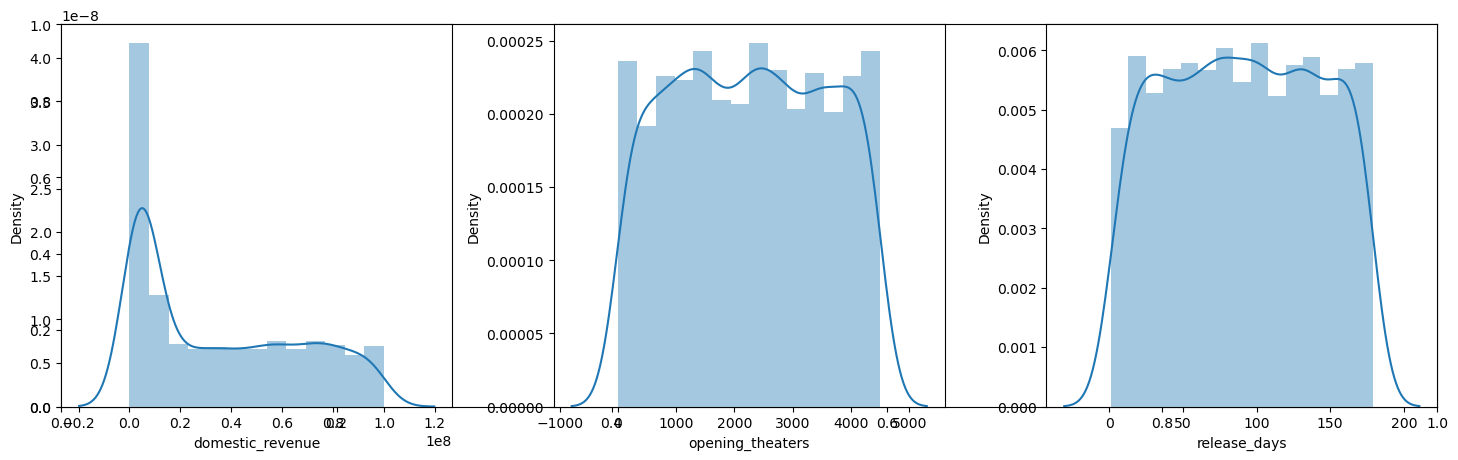

(<Figure size 1500x500 with 1 Axes>, <Axes: >)

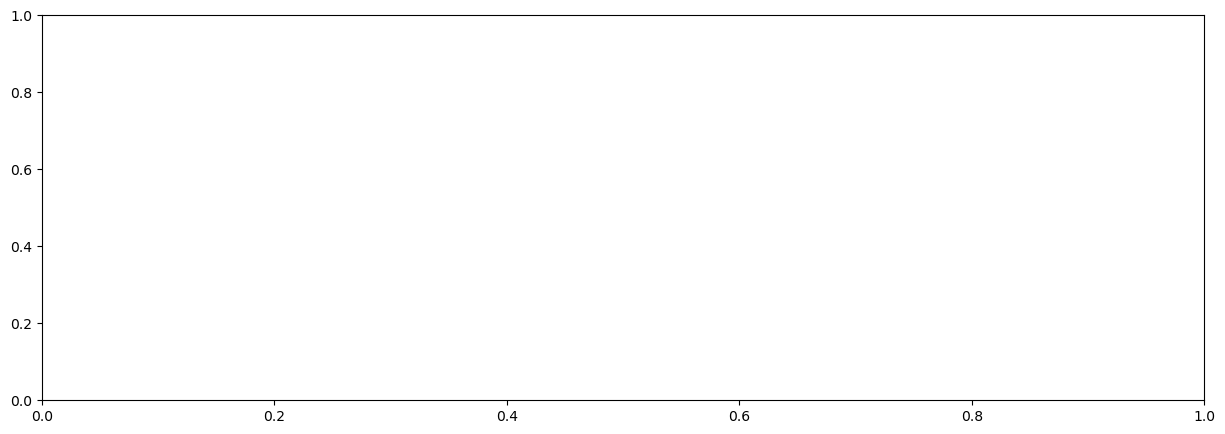

In [32]:
plt.subplots(figsize=(15,5))
for i,c in enumerate(['domestic_revenue', 'opening_theaters', 'release_days']):
    plt.subplot(1,3,i+1)
    sb.distplot(dt[c])
plt.tight_layout()
plt.show()
plt.subplots(figsize=(15, 5))
